# Introduction
The Binder that you see right now is from Shajenna Raduzzi with student nummer i6191302. 

Everybody in the world took a bit a hit, because of the coronavirus. Some countries took stronger policies immediately than others. However, did these strong policies work in the battle against corona cases, and the fatality rate? In this, research is focused on corona cases and the fatality rate because these values represent how many new cases of corona come every day and how much people died from corona that day. 

The aim is to research whether countries policies influences the new cases of corona and the fatality rate. How does the country policy influence the new cases and the fatality rate in one of the selected countries? How does the one selected country compare to the other selected countries?


# Methods

The objectives are to research first to research per country what the policy were over time. Then compare all the countries to each other and figure out which countries had the 5 most strict policies and the 5 lest strict policies over time. 

The search per selected country the new cases and the fatality rate per 1 000 000 persons, because these variables are standardized in the data. 

Combine the policies with the new cases and fatality rate per country in a graph and compare the countries to each other.



# Data preparation 
First the methods' panda, altair, and widgets were imported into the dataset. The next step was to use the hyperlink from the Word document and copy it in. First the whole set was defined, and then the COVID-19 set was generally made. 

In [686]:
import pandas as pd
import altair as alt 
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import AppLayout
from vega_datasets import data
import numpy as np





#The full Covid dataset

In [687]:

covid_full = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

covid = covid_full.sample(frac=.2, random_state=42)

covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
30935,CHN,Asia,China,2021-06-12,91428.0,34.0,25.714,4636.0,0.0,0.000,63.306,0.024,0.018,3.210,0.000,0.000,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,878523000.0,NaN,NaN,NaN,15010000.0,16494000.0,60.83,NaN,NaN,NaN,11421.0,5850649.0,0.405,69.91,1.444216e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.340,76.91,0.761,NaN,NaN,NaN,NaN
81600,LBN,Asia,Lebanon,2020-09-22,30852.0,865.0,771.857,315.0,8.0,9.000,4557.736,127.786,114.026,46.535,1.182,1.330,1.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.22,6.769151e+06,594.561,31.1,8.514,5.430,13367.565,NaN,266.591,12.71,26.9,40.7,NaN,2.900,78.93,0.744,NaN,NaN,NaN,NaN
91600,MLI,Africa,Mali,2021-01-04,7260.0,7.0,79.571,279.0,1.0,3.286,348.106,0.336,3.815,13.378,0.048,0.158,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.85,2.085572e+07,15.196,16.4,2.519,1.486,2014.306,NaN,268.024,2.42,1.6,23.0,52.232,0.100,59.31,0.434,NaN,NaN,NaN,NaN
127944,SRB,Europe,Serbia,2021-09-30,941989.0,7549.0,6995.143,8234.0,47.0,44.000,137085.434,1098.588,1017.987,1198.275,6.840,6.403,1.05,241.0,35.072,6304.0,917.406,NaN,NaN,NaN,NaN,23991.0,5650408.0,822.291,3.491,21724.0,3.161,0.3220,3.1,people tested,6497670.0,3040293.0,2901882.0,555495.0,20471.0,17957.0,94.56,44.24,42.23,8.08,2613.0,3681.0,0.054,47.22,6.871547e+06,80.291,41.2,17.366,NaN,14048.881,NaN,439.415,10.08,37.7,40.2,97.719,5.609,76.00,0.806,34080.6,19.29,50.57,4959.669198
142615,TZA,Africa,Tanzania,2020-10-27,509.0,0.0,0.000,21.0,0.0,0.000,8.277,0.000,0.000,0.341,0.000,0.000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.59,6.149844e+07,64.699,17.7,3.108,1.874,2683.304,49.1,217.288,5.75,3.3,26.7,47.953,0.700,65.46,0.529,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142994,TZA,Africa,Tanzania,2021-11-10,26196.0,0.0,6.000,725.0,0.0,0.000,425.962,0.000,0.098,11.789,0.000,0.000,0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13976.0,NaN,NaN,NaN,NaN,227.0,14452.0,0.023,8.33,6.149844e+07,64.699,17.7,3.108,1.874,2683.304,49.1,217.288,5.75,3.3,26.7,47.953,0.700,65.46,0.529,NaN,NaN,NaN,NaN
57436,GIB,Europe,Gibraltar,

#Full covid data set exploration

I had a few questions while looking at the whole data, and have the questions answered here.

### How many rows are under every continent in the dataset?

In [688]:
covid['continent'].value_counts()



Africa           7491
Europe           7089
Asia             7059
North America    4874
South America    1902
Oceania          1752
Name: continent, dtype: int64

### How many locations are in the dataset?

In [689]:
covid['location'].value_counts()

Honduras        176
Tanzania        170
Philippines     169
Mexico          169
Japan           168
               ... 
Palau            34
Turkmenistan     32
Pitcairn         23
Tokelau          21
Niue              7
Name: location, Length: 238, dtype: int64

### How many missing values are there in the total covid data set?

In [690]:
covid.isnull().sum()

iso_code                                       0
continent                                   1926
location                                       0
date                                           0
total_cases                                  608
                                           ...  
human_development_index                     5743
excess_mortality_cumulative_absolute       30990
excess_mortality_cumulative                30990
excess_mortality                           30988
excess_mortality_cumulative_per_million    30990
Length: 67, dtype: int64

# Select rows and Columns

The rows all kept in for now, because I need all the dates. In the explore and clean data part are the rows more selected.

The selected colums relevant to my research question :

*   stringency_index 

: Government Response Stringency Index: composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response)

*   date   

: Date of observation

*   iso_Code 

:SO 3166-1 alpha-3 – three-letter country codes

*   location 

:Geographical location

*   total_cases

: Total confirmed cases of COVID-19. Counts can include probable cases, where reported.
*   new_cases_per_million

:Total confirmed cases of COVID-19 per 1,000,000 people. Counts can include probable cases, where reported.


*   total_deaths 

: Total deaths attributed to COVID-19. Counts can include probable deaths, where reported.

*   new_deaths_per_million

:Total deaths attributed to COVID-19 per 1,000,000 people. Counts can include probable deaths, where reported.



### The table based on the selected columns

In [691]:
cl= covid.loc[:, ['continent', 'iso_code','location','stringency_index', 'date', 'total_cases','new_cases_per_million', 'total_deaths', 'new_deaths_per_million']]

cl

,continent,iso_code,location,stringency_index,date,total_cases,new_cases_per_million,total_deaths,new_deaths_per_million
30935,Asia,CHN,China,69.91,2021-06-12,91428.0,0.024,4636.0,0.000
81600,Asia,LBN,Lebanon,72.22,2020-09-22,30852.0,127.786,315.0,1.182
91600,Africa,MLI,Mali,51.85,2021-01-04,7260.0,0.336,279.0,0.048
127944,Europe,SRB,Serbia,47.22,2021-09-30,941989.0,1098.588,8234.0,6.840
142615,Africa,TZA,Tanzania,17.59,2020-10-27,509.0,0.000,21.0,0.000
...,...,...,...,...,...,...,...,...,...
142994,Africa,TZA,Tanzania,8.33,2021-11-10,26196.0,0.000,725.0,0.000
57436,Europe,GIB,Gibraltar,NaN,2021-07-03,4364.0,207.771,94.0,0.000
12274,Asia,BGD,Bangladesh,74.54,2020-06-23,119198.0,20.517,1545.0,0.259
87990,Asia,MAC,Macao,23.15,2020-09-25,46.0,0.000,NaN,NaN


# Explore an clean the data



In [692]:
print('number of samples are: ',c1.shape)

number of samples are:  (178, 8)


### Missing data

The variables that all had a lot of missing values were: continent, stringency-index, total cases, new cases_per-million, total-deaths, and new_deaths_per-million.

The missing total-Cases and new-cases_per-million are like the total-death and new-death_per-million probably connected because the missing values are near each other.  The missing stringency index values are the values I should focus on because the stringency index is my main value in the research question.

My plan is to delete the values that are missing the stringency index. The variables the new-cases_per-million and the new-death_per-million will also be deleted because they are important in the graph, and the missing values total-Cases and total_deaths will also be deleted. 



In [693]:
cl.isnull().sum()

continent                 1926
iso_code                     0
location                     0
stringency_index          6898
date                         0
total_cases                608
new_cases_per_million      788
total_deaths              4050
new_deaths_per_million    4183
dtype: int64

Deleting the missing values of the variables stringency index, new-cases_per-million and new-death_per-million.

In [694]:
cd = cl.dropna(thresh=3, subset=['stringency_index', 'new_cases_per_million', 'new_deaths_per_million'])
cd = cd.sort_values(by='iso_code')
cd

,continent,iso_code,location,stringency_index,date,total_cases,new_cases_per_million,total_deaths,new_deaths_per_million
7350,North America,ABW,Aruba,54.17,2020-10-15,4285.0,279.864,32.0,0.000
7726,North America,ABW,Aruba,41.67,2021-10-26,15848.0,307.850,171.0,0.000
7209,North America,ABW,Aruba,66.67,2020-05-27,101.0,0.000,3.0,0.000
7191,North America,ABW,Aruba,81.48,2020-05-09,101.0,0.000,3.0,0.000
7508,North America,ABW,Aruba,56.48,2021-03-22,8800.0,270.535,82.0,0.000
...,...,...,...,...,...,...,...,...,...
160229,Africa,ZWE,Zimbabwe,67.59,2021-06-18,41335.0,27.034,1656.0,0.596
159982,Africa,ZWE,Zimbabwe,71.30,2020-10-14,8055.0,1.259,231.0,0.066
160433,Africa,ZWE,Zimbabwe,52.78,2022-01-08,221918.0,42.141,5148.0,0.795
160157,Africa,ZWE,Zimbabwe,57.41,2021-04-07,36984.0,1.193,1531.0,0.000


In [695]:
print('number of samples are: ',cd.shape)

number of samples are:  (23141, 9)


In this table I checked if the variables were truly gone. Some countries data were NaN and these were also deleted. 

In [696]:
cd.isnull().sum()

continent                 0
iso_code                  0
location                  0
stringency_index          0
date                      0
total_cases               0
new_cases_per_million     0
total_deaths              0
new_deaths_per_million    0
dtype: int64

###Correct for negative values

In this data base the total_cases, total_Deaths, new_cases_per_million, and new_deaths_per_million cannot have a negative value, so in this table it is corrected for. After the correction was apparent that there were no negative values in the database, because the rows and colums are still the same number. 

In [697]:
cd2 = cd.loc[(cd.total_cases > 0) | (cd.total_deaths > 0) |(cd.new_cases_per_million > 0) | (cd.new_deaths_per_million > 0), ]
cd2

,continent,iso_code,location,stringency_index,date,total_cases,new_cases_per_million,total_deaths,new_deaths_per_million
7350,North America,ABW,Aruba,54.17,2020-10-15,4285.0,279.864,32.0,0.000
7726,North America,ABW,Aruba,41.67,2021-10-26,15848.0,307.850,171.0,0.000
7209,North America,ABW,Aruba,66.67,2020-05-27,101.0,0.000,3.0,0.000
7191,North America,ABW,Aruba,81.48,2020-05-09,101.0,0.000,3.0,0.000
7508,North America,ABW,Aruba,56.48,2021-03-22,8800.0,270.535,82.0,0.000
...,...,...,...,...,...,...,...,...,...
160229,Africa,ZWE,Zimbabwe,67.59,2021-06-18,41335.0,27.034,1656.0,0.596
159982,Africa,ZWE,Zimbabwe,71.30,2020-10-14,8055.0,1.259,231.0,0.066
160433,Africa,ZWE,Zimbabwe,52.78,2022-01-08,221918.0,42.141,5148.0,0.795
160157,Africa,ZWE,Zimbabwe,57.41,2021-04-07,36984.0,1.193,1531.0,0.000


In [698]:
print('number of samples are: ',cd2.shape)

number of samples are:  (23141, 9)


###Stringency index description

I was wondering about the main value for our research quistion : the stingency index. 

The descriprion is sorted by count to look which countries had the most change in policy and which country had the least change in policy. 

In this description were allot locations included which did not have any data. Also whole continents like Europe were eventually excluded, because of their missing data.

proof that continent Europe or European is not in the data set anymore. On other continents was also tested but there were not anymore in the data set after cleaning. 

In [699]:
cd[cd['location'].str.contains("Europe")]

,continent,iso_code,location,stringency_index,date,total_cases,new_cases_per_million,total_deaths,new_deaths_per_million


In [700]:
cd[cd['location'].str.contains("Europe Union")]

,continent,iso_code,location,stringency_index,date,total_cases,new_cases_per_million,total_deaths,new_deaths_per_million


### *The stringency index description before missing values cleaning*

In [701]:
c1 = covid.groupby('location').stringency_index.describe()
c1.sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Honduras,176.0,80.439830,14.793877,11.11,76.85,81.48,87.96,100.00
Mexico,169.0,52.744793,24.147484,0.00,35.19,57.87,71.76,82.41
Tanzania,168.0,18.562083,13.228803,2.78,8.33,13.89,28.70,52.78
Japan,168.0,42.456905,10.407301,2.78,35.19,47.22,49.07,55.09
Malta,166.0,54.005241,15.983136,11.11,43.52,52.78,56.48,87.04
...,...,...,...,...,...,...,...,...
Sao Tome and Principe,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jersey,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Samoa,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### *The stringency index description after missing values cleaning*

In [702]:
c1 = cd.groupby('location').stringency_index.describe()
c1.sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Honduras,171.0,80.777602,13.307896,34.26,76.85,81.48,87.9600,100.00
Tanzania,166.0,18.417590,13.114562,2.78,8.33,13.89,28.0075,52.78
Philippines,166.0,72.200361,14.903679,25.00,68.98,71.76,77.7800,100.00
Japan,161.0,43.733602,8.438526,19.44,37.04,47.22,49.0700,55.09
China,160.0,70.751750,9.849442,44.44,63.43,73.61,78.2400,81.94
...,...,...,...,...,...,...,...,...
Laos,58.0,67.058103,12.475842,48.15,53.70,69.44,79.0500,85.19
Vanuatu,54.0,20.779444,1.848318,16.67,19.44,22.22,22.2200,22.22
Dominica,39.0,66.097436,18.673209,37.04,37.04,79.63,79.6300,79.63


### *The new_cases_per_million description*

In [703]:
c5 = cd.groupby('location').new_cases_per_million.describe()
c5.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Greenland,8.0,5466.606875,5652.978482,0.000,1318.84350,3314.6940,9390.16675,13856.650
Faeroe Islands,63.0,1215.724175,4126.210547,0.000,0.00000,20.3860,387.33600,25666.116
Seychelles,77.0,779.404532,1170.387708,0.000,151.65300,475.1790,960.46900,8310.585
Dominica,39.0,630.971333,955.953474,0.000,0.00000,0.0000,956.04950,4904.949
Mongolia,82.0,560.048939,636.899503,2.403,129.90775,359.9875,720.72625,2428.151
...,...,...,...,...,...,...,...,...
Yemen,129.0,0.559636,0.907186,0.000,0.06600,0.1640,0.65600,5.707
Tanzania,166.0,0.453343,3.783935,0.000,0.00000,0.0000,0.00000,45.904
Chad,123.0,0.409480,0.727453,0.000,0.00000,0.0590,0.56150,4.670


### *The new_deats_per_million description*

In [704]:
c6 = cd.groupby('location').new_deaths_per_million.describe()
c6.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Peru,134.0,9.543276,8.589568,0.000,1.499,6.7750,16.80200,34.683
Bulgaria,143.0,7.183056,8.536365,0.000,0.580,3.6250,12.25250,40.019
Bosnia and Herzegovina,124.0,6.768508,9.736349,-3.371,0.000,2.6045,10.57125,63.430
Hungary,145.0,6.072545,8.011105,0.000,0.104,1.2460,10.69100,37.990
Georgia,123.0,5.458472,5.554699,0.000,0.628,4.0200,9.17150,23.871
...,...,...,...,...,...,...,...,...
Chad,123.0,0.011512,0.029893,0.000,0.000,0.0000,0.00000,0.177
Tanzania,166.0,0.006175,0.048700,0.000,0.000,0.0000,0.00000,0.472
China,160.0,0.001844,0.007630,0.000,0.000,0.0000,0.00000,0.048


### *The total_deaths description*

In [705]:
c7 = cd.groupby('location').total_deaths.describe()
c7.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
United States,136.0,416170.544118,269989.401980,1.0,139014.75,511357.5,609912.50,887824.0
Brazil,115.0,312993.713043,223292.350167,3.0,134615.50,250236.0,559408.00,623370.0
India,152.0,227870.802632,183548.649368,1.0,51922.25,157718.5,434064.75,502874.0
Mexico,152.0,152755.921053,104798.913988,2.0,59495.75,171895.5,235586.75,309417.0
Peru,134.0,128868.529851,67880.813565,2.0,83025.00,140069.5,197986.00,207312.0
...,...,...,...,...,...,...,...,...
Burundi,132.0,11.719697,15.398679,1.0,1.00,3.0,16.25,38.0
Faeroe Islands,63.0,4.095238,5.229304,1.0,1.00,2.0,2.00,18.0
Greenland,8.0,3.500000,2.203893,1.0,1.75,3.0,6.00,6.0


### *The total_cases description*

In [706]:
c8 = cd.groupby('location').total_cases.describe()
c8.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
United States,136.0,2.405593e+07,1.908569e+07,32.0,3574438.25,28642996.5,34434720.50,74992871.0
India,152.0,1.720073e+07,1.432786e+07,62.0,2710103.25,11205044.0,32401023.00,42272014.0
Brazil,115.0,1.130647e+07,8.152856e+06,372.0,4444870.50,10334634.0,20014138.50,24054405.0
Russia,153.0,4.379603e+06,3.273620e+06,199.0,1111157.00,4360033.0,6672373.00,11936064.0
France,142.0,4.148042e+06,4.227156e+06,18.0,225144.50,3433656.5,6528717.75,20654882.0
...,...,...,...,...,...,...,...,...
Monaco,127.0,2.130465e+03,1.817821e+03,77.0,249.50,2391.0,3244.50,8183.0
Bhutan,69.0,1.982855e+03,8.453231e+02,842.0,957.00,2489.0,2623.00,4685.0
Bermuda,130.0,1.893000e+03,2.273856e+03,39.0,181.00,688.0,2549.25,9766.0


According to the descriptions of new_cases_per_million, and new_deaths_per_million were there no new deaths or new cases per million in Vanuata, but the total_cases, total_Deaths indicates there were new deaths and cases due to corona. The Solomon Islands only have one row in the database, so they are excluded due to the lack of data. 

Before the deletion of the location Solomon Islands.

In [707]:
cd[cd['location'].str.contains('Solomon Islands')]

,continent,iso_code,location,stringency_index,date,total_cases,new_cases_per_million,total_deaths,new_deaths_per_million
132392,Oceania,SLB,Solomon Islands,72.69,2022-02-06,2790.0,0.000,25.0,0.000
132388,Oceania,SLB,Solomon Islands,72.69,2022-02-02,2167.0,967.336,15.0,4.261
132384,Oceania,SLB,Solomon Islands,72.69,2022-01-29,898.0,0.000,5.0,0.000
132380,Oceania,SLB,Solomon Islands,72.69,2022-01-25,650.0,512.788,2.0,2.841


Before the deletion of the location Vanuatu.

In [708]:
cd11 = cd[cd['location'].str.contains('Vanuatu')]
cd11

,continent,iso_code,location,stringency_index,date,total_cases,new_cases_per_million,total_deaths,new_deaths_per_million
155018,Oceania,VUT,Vanuatu,19.44,2022-01-24,7.0,0.0,1.0,0.0
154807,Oceania,VUT,Vanuatu,22.22,2021-06-27,4.0,0.0,1.0,0.0
154802,Oceania,VUT,Vanuatu,22.22,2021-06-22,4.0,0.0,1.0,0.0
154938,Oceania,VUT,Vanuatu,19.44,2021-11-05,6.0,0.0,1.0,0.0
155004,Oceania,VUT,Vanuatu,19.44,2022-01-10,7.0,0.0,1.0,0.0
154747,Oceania,VUT,Vanuatu,22.22,2021-04-28,4.0,0.0,1.0,0.0
154764,Oceania,VUT,Vanuatu,22.22,2021-05-15,4.0,0.0,1.0,0.0
154995,Oceania,VUT,Vanuatu,19.44,2022-01-01,7.0,0.0,1.0,0.0
154774,Oceania,VUT,Vanuatu,22.22,2021-05-25,4.0,0.0,1.0,0.0
154818,Oceania,VUT,Vanuatu,22.22,2021-07-08,4.0,0.0,1.0,0.0


In [709]:
print('number of samples in the location Vanuata: ',cd11.shape)

number of samples in the location Vanuata:  (54, 9)


In [710]:
# remove rows using the drop() function
c10 = cd.drop(cd.index[cd['location'] == ('Vanuatu') ], inplace=True)
# display the data
display(c10)

None

In [711]:

# remove rows using the drop() function
c10 = cd.drop(cd.index[cd['location'] == ('Solomon Islands') ], inplace=True)
# display the data
display(c10)

None

After the deletion of the location Solomon Islands.

In [712]:
cd[cd['location'].str.contains('Solomon Islands')]

,continent,iso_code,location,stringency_index,date,total_cases,new_cases_per_million,total_deaths,new_deaths_per_million


After the deletion of the location Vanuatu

In [713]:
cd[cd['location'].str.contains("Vanuatu")]

,continent,iso_code,location,stringency_index,date,total_cases,new_cases_per_million,total_deaths,new_deaths_per_million


# Describe and visuealise
•	Provide a description of the population for the reader (e.g. countries or continents) relevant to your question using a table with descriptive statistics (i.e. means, medians, standard deviations) and where possible visualisation. (15pt)

•	Make the report interactive: Create at least one interactive visualisation using input from the user. (20pt)

•	Turn your interactive report into an application using GitHub, Voila and Binder.** (15pt)


The discription of stringency_index is the exercise above. The value stingency_index is on the website defined in specific classes (in the picture below). These classes were used to specify in the data more how many strict policies some countries had. This is via the use of dummy variables, then the dummy variables were put into a table to be each summed up for their specific location. 

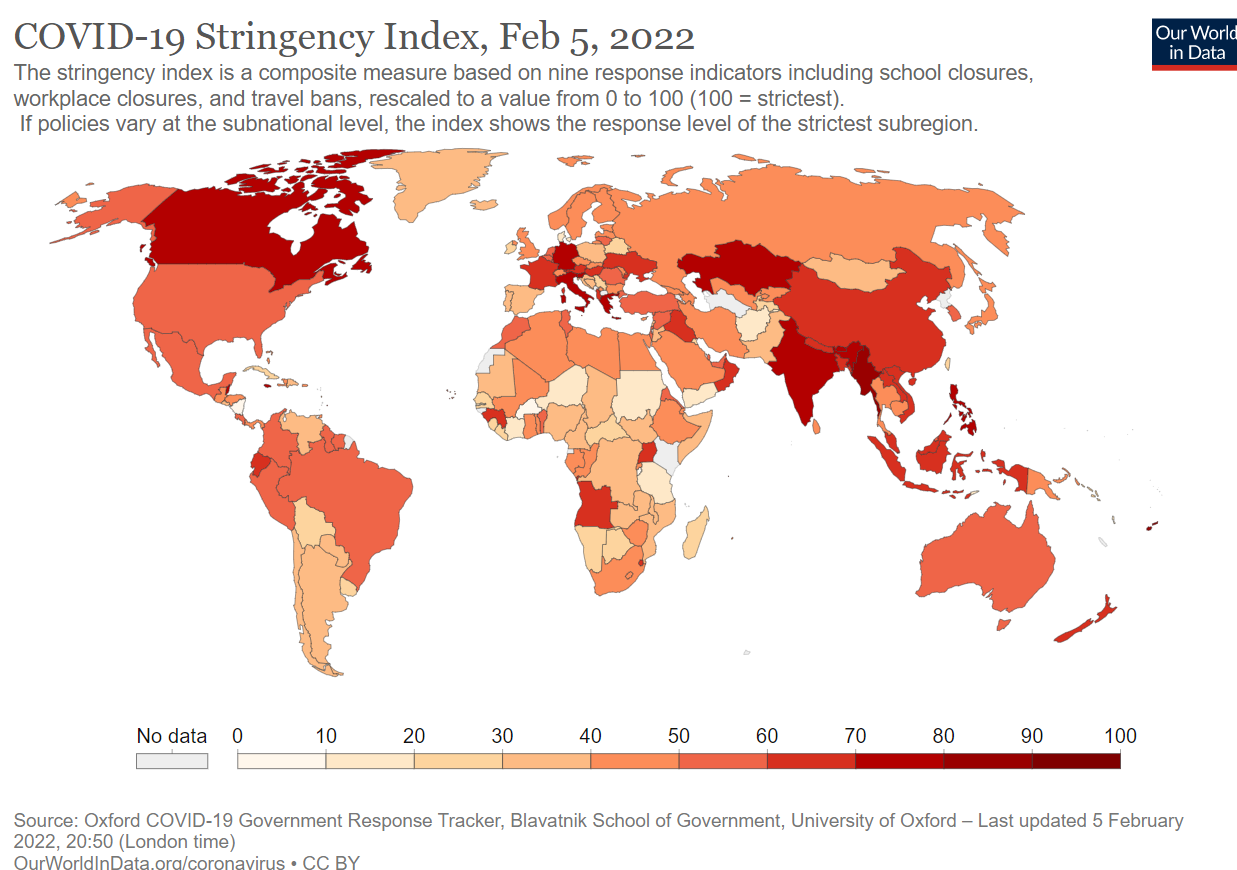

###The dummy variable table

In [714]:
#dummy variables
cd['stringency_index_1'] = (cd['stringency_index'] <=10).astype(int)
cd['stringency_index_2'] = (cd['stringency_index'] <=20).astype(int)
cd['stringency_index_3'] = (cd['stringency_index'] <=30).astype(int)
cd['stringency_index_4'] = (cd['stringency_index'] <=40).astype(int)
cd['stringency_index_5'] = (cd['stringency_index'] <=50).astype(int)
cd['stringency_index_6'] = (cd['stringency_index'] <=60).astype(int)
cd['stringency_index_7'] = (cd['stringency_index'] <=70).astype(int)
cd['stringency_index_8'] = (cd['stringency_index'] <=80).astype(int)
cd['stringency_index_9'] = (cd['stringency_index'] <=90).astype(int)
cd['stringency_index_10'] = (cd['stringency_index'] <=100).astype(int)

# put dummy variables into table
cdummy= cd.loc[:, ['location','date','stringency_index_1', 'stringency_index_2', 'stringency_index_3', 'stringency_index_4', 'stringency_index_5', 'stringency_index_6', 'stringency_index_7', 'stringency_index_8', 'stringency_index_9', 'stringency_index_10']]

#Sum all the dummy variables up on their specific location via groupby
cx = cdummy.groupby(['location']).sum() 
cx

,stringency_index_1,stringency_index_2,stringency_index_3,stringency_index_4,stringency_index_5,stringency_index_6,stringency_index_7,stringency_index_8,stringency_index_9,stringency_index_10
location,,,,,,,,,,
Afghanistan,0,46,87,98,107,116,120,141,149,149
Albania,0,0,0,21,51,76,119,123,135,135
Algeria,0,0,0,14,24,52,64,127,132,135
Andorra,0,0,0,4,61,128,131,131,131,131
Angola,0,0,0,5,7,55,95,128,129,134
...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,12,18,18,18,18,21,139,142
Vietnam,0,0,0,0,5,31,70,115,117,117
Yemen,0,31,69,114,114,117,129,129,129,129


### Percentage table 

In [715]:
# The dummy variables were converted into variables to see the difference better from the total count stringency index from their own country. 
# The nummer -1 is in the percentage formula to convert the numbers in less then 1 and to turn the percentages aroudn for better explanation of the data
cx['stingency_Total'] = cd.groupby('location').stringency_index.count()

cx['percentage_1']= 1 - (cx['stringency_index_1'])/(cx['stingency_Total'])
cx['percentage_2']= 1 - (cx['stringency_index_2'])/(cx['stingency_Total'])
cx['percentage_3']= 1 - (cx['stringency_index_3'])/(cx['stingency_Total'])  
cx['percentage_4']= 1 - (cx['stringency_index_4'])/(cx['stingency_Total']) 
cx['percentage_5']= 1 - (cx['stringency_index_5'])/(cx['stingency_Total']) 
cx['percentage_6']= 1 - (cx['stringency_index_6'])/(cx['stingency_Total']) 
cx['percentage_7']= 1 - (cx['stringency_index_7'])/(cx['stingency_Total']) 
cx['percentage_8']= 1 - (cx['stringency_index_8'])/(cx['stingency_Total']) 
cx['percentage_9']= 1-(cx['stringency_index_9'])/(cx['stingency_Total']) 
cx['percentage_10']=1- (cx['stringency_index_10'])/(cx['stingency_Total']) 


ck= cx.loc[:,['percentage_1', 'percentage_2', 'percentage_3', 'percentage_4', 'percentage_5', 'percentage_6', 'percentage_7', 'percentage_8', 'percentage_9', 'percentage_10']]
ck

,percentage_1,percentage_2,percentage_3,percentage_4,percentage_5,percentage_6,percentage_7,percentage_8,percentage_9,percentage_10
location,,,,,,,,,,
Afghanistan,1.0,0.691275,0.416107,0.342282,0.281879,0.221477,0.194631,0.053691,0.000000,0.0
Albania,1.0,1.000000,1.000000,0.844444,0.622222,0.437037,0.118519,0.088889,0.000000,0.0
Algeria,1.0,1.000000,1.000000,0.896296,0.822222,0.614815,0.525926,0.059259,0.022222,0.0
Andorra,1.0,1.000000,1.000000,0.969466,0.534351,0.022901,0.000000,0.000000,0.000000,0.0
Angola,1.0,1.000000,1.000000,0.962687,0.947761,0.589552,0.291045,0.044776,0.037313,0.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela,1.0,1.000000,0.915493,0.873239,0.873239,0.873239,0.873239,0.852113,0.021127,0.0
Vietnam,1.0,1.000000,1.000000,1.000000,0.957265,0.735043,0.401709,0.017094,0.000000,0.0
Yemen,1.0,0.759690,0.465116,0.116279,0.116279,0.093023,0.000000,0.000000,0.000000,0.0


### The 5 selected countries with the least strict rules.

Nicarangua had the least strictt rules according to the data, because 0 indicates there were sometimes 0% stringency index.

In [716]:
ci= ck.sort_values(by=['percentage_1', 'percentage_2', 'percentage_3', 'percentage_4', 'percentage_5', 'percentage_6', 'percentage_7', 'percentage_8', 'percentage_9', 'percentage_10'], ascending=True).head(n=5)
ci

,percentage_1,percentage_2,percentage_3,percentage_4,percentage_5,percentage_6,percentage_7,percentage_8,percentage_9,percentage_10
location,,,,,,,,,,
Nicaragua,0.343066,0.102190,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Tanzania,0.704819,0.265060,0.222892,0.078313,0.060241,0.000000,0.000000,0.000000,0.0,0.0
Burundi,0.931818,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Mali,0.976378,0.976378,0.976378,0.850394,0.291339,0.094488,0.078740,0.000000,0.0,0.0
Cote d'Ivoire,0.982143,0.687500,0.366071,0.258929,0.241071,0.241071,0.107143,0.107143,0.0,0.0


###The 5 selected countries with the strictest rules

Jamaica had the strictest rules according to the data, because 1 indicates there were sometimes 100% stringency index.

In [717]:
cu= ck.sort_values(by=['percentage_1', 'percentage_2', 'percentage_3', 'percentage_4', 'percentage_5', 'percentage_6', 'percentage_7', 'percentage_8', 'percentage_9', 'percentage_10'], ascending=False).head(n=5)
cu

,percentage_1,percentage_2,percentage_3,percentage_4,percentage_5,percentage_6,percentage_7,percentage_8,percentage_9,percentage_10
location,,,,,,,,,,
Jamaica,1.0,1.0,1.0,1.0,1.0,1.000000,0.791667,0.141667,0.000000,0.0
Myanmar,1.0,1.0,1.0,1.0,1.0,1.000000,0.773723,0.335766,0.000000,0.0
Morocco,1.0,1.0,1.0,1.0,1.0,0.923611,0.409722,0.118056,0.097222,0.0
Kazakhstan,1.0,1.0,1.0,1.0,1.0,0.882353,0.625000,0.257353,0.058824,0.0
Suriname,1.0,1.0,1.0,1.0,1.0,0.837037,0.600000,0.348148,0.044444,0.0


### The selected countries data

In [718]:
covid_selected_countries_1 = cd.loc[cd['location'].isin(['Jamaica', 'Myanmar', 'Kazakhstan', 'Suriname', 'Ecuador', 'Somalia', "Cote d'Ivoire", 'Burundi', 'Tanzania', 'Nicaragua'])]
covid_selected_countries= covid_selected_countries_1.sort_values(by= ['iso_code', 'date'])

def select_country_data(iso_code, df):
  return df.loc[df['iso_code'] == iso_code,  ]

interact(select_country_data, iso_code= [('Jamaica', 'JAM') ,
                                           ('Myanmar', 'MMR'),
                                         ('Kazakhstan', 'KAZ'),
                                           ('Suriname', 'SUR'),
                                           ('Ecuador', 'ECU'),
                                           ('Nicaragua', 'NIC'),
                                           ('Somalia', 'SOM'),
                                           ("Cote d'Ivoire", 'CIV'),
                                           ('Burundi', 'BDI'),
                                           ('Tanzania', 'TZA')] , df=fixed(covid_selected_countries));

interactive(children=(Dropdown(description='iso_code', options=(('Jamaica', 'JAM'), ('Myanmar', 'MMR'), ('Kaza…

In [719]:
covid_selected_countries_1 = cd.loc[cd['location'].isin(['Jamaica'])]
Jamaica= covid_selected_countries_1.sort_values(by= ['iso_code', 'date'])

covid_selected_countries_1 = cd.loc[cd['location'].isin(['Myanmar'])]
Myanmar= covid_selected_countries_1.sort_values(by= ['iso_code', 'date'])

covid_selected_countries_1 = cd.loc[cd['location'].isin(['Kazakhstan'])]
Kazakhstan= covid_selected_countries_1.sort_values(by= ['iso_code', 'date'])

covid_selected_countries_1 = cd.loc[cd['location'].isin(['Suriname'])]
Suriname= covid_selected_countries_1.sort_values(by= ['iso_code', 'date'])

covid_selected_countries_1 = cd.loc[cd['location'].isin(['Ecuador'])]
Ecuador= covid_selected_countries_1.sort_values(by= ['iso_code', 'date'])

covid_selected_countries_1 = cd.loc[cd['location'].isin(['Nicaragua'])]
Nicaragua= covid_selected_countries_1.sort_values(by= ['iso_code', 'date'])

covid_selected_countries_1 = cd.loc[cd['location'].isin(['Somalia'])]
Somalia= covid_selected_countries_1.sort_values(by= ['iso_code', 'date'])

covid_selected_countries_1 = cd.loc[cd['location'].isin(["Cote d'Ivoire"])]
CotedIvoire= covid_selected_countries_1.sort_values(by= ['iso_code', 'date'])

covid_selected_countries_1 = cd.loc[cd['location'].isin(['Burundi'])]
Burundi= covid_selected_countries_1.sort_values(by= ['iso_code', 'date'])

covid_selected_countries_1 = cd.loc[cd['location'].isin(['Tanzania'])]
Tanzania= covid_selected_countries_1.sort_values(by= ['iso_code', 'date'])


### Jamaica (Left) , Myamar(Right)

Jamaica and Myamar had very strict policies, and all the tables of these two can been seen that the policies stays strict and the new cases or new deaths are not effected by it. 

In [737]:
#Jamaica new_cases_per_million
jline= alt.Chart(Jamaica).mark_line(stroke='black', strokeWidth=4).encode(
      x= 'date:T',
      y='new_cases_per_million:Q' ,
).properties(
    width=500,
    height=300,
  )
  
jmark= alt.Chart(Jamaica).mark_point(strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_cases_per_million:Q' ,
      color=alt.Color('stringency_index:Q', scale=alt.Scale(scheme='yelloworangered', domain=[0, 100])),
      tooltip=(['date',"stringency_index", "location", "new_cases:Q"]),
).properties(
    width=500,
    height=300,
)

#Jamaica new_deaths_per_million
j1line= alt.Chart(Jamaica).mark_line(stroke='black', strokeWidth=4).encode(
      x= 'date:T',
      y='new_deaths_per_million:Q' ,
).properties(
    width=500,
    height=300,
  )
  
j2mark= alt.Chart(Jamaica).mark_point(strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_deaths_per_million:Q' ,
      color=alt.Color('stringency_index:Q', scale=alt.Scale(scheme='yelloworangered', domain=[0, 100])),
      tooltip=(['date',"stringency_index", "location", "new_cases:Q"]),
).properties(
    width=500,
    height=300,
)

# Myanmar new_cases_per_million
mline= alt.Chart(Myanmar).mark_line(stroke='black', strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_cases_per_million:Q' ,
).properties(
    width=500,
    height=300
  )


mmark= alt.Chart(Myanmar).mark_point(strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_cases_per_million:Q' ,
      color=alt.Color('stringency_index:Q', scale=alt.Scale(scheme='yelloworangered', domain=[0, 100])),
      tooltip=(['date',"stringency_index", "location", "new_cases:Q"]),
).properties(
    width=500,
    height=300
  )

# Myanmar new_deaths_per_million
m2line= alt.Chart(Myanmar).mark_line(stroke='black', strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_deaths_per_million:Q' ,
).properties(
    width=500,
    height=300
  )


m1mark= alt.Chart(Myanmar).mark_point(strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_deaths_per_million:Q' ,
      color=alt.Color('stringency_index:Q', scale=alt.Scale(scheme='yelloworangered', domain=[0, 100])),
      tooltip=(['date',"stringency_index", "location", "new_cases:Q"]),
).properties(
    width=500,
    height=300
  )

display(jline + jmark | mline + mmark)
display(j1line+j2mark| m1mark +m2line)

alt.HConcatChart(...)

alt.HConcatChart(...)

### Kazakhstan (Left) , Surina(Right)

In Kazakhstan can been seen how the graph in the "new_cases_per_million" suddenly goes up. The stingency index was around 63 and a month later after the peak the stingency index went up.
In the two peeks of the "new_cases_per_million" table can been how first when the cases go up rapidly the rules become stricter.The second peek show that even though the peek. The rules become less strict.

In [738]:

# Kazakhstan new_cases_per_million
kline= alt.Chart(Kazakhstan).mark_line(stroke='black', strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_cases_per_million:Q' ,
).properties(
    width=500,
    height=300
  )


kmark= alt.Chart(Kazakhstan).mark_point(strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_cases_per_million:Q' ,
      color=alt.Color('stringency_index:Q', scale=alt.Scale(scheme='yelloworangered', domain=[0, 100])),
      tooltip=(['date',"stringency_index", "location", "new_cases_per_million"]),
).properties(
    width=500,
    height=300
  )

# Kazakhstan new_deaths_per_million
k1line= alt.Chart(Kazakhstan).mark_line(stroke='black', strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_deaths_per_million:Q' ,
).properties(
    width=500,
    height=300
  )


k1mark= alt.Chart(Kazakhstan).mark_point(strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_cases_per_million:Q' ,
      color=alt.Color('stringency_index:Q', scale=alt.Scale(scheme='yelloworangered', domain=[0, 100])),
      tooltip=(['date',"stringency_index", "location", "new_cases_per_million"]),
).properties(
    width=500,
    height=300
  )
# Suriname new_cases_per_million
sline= alt.Chart(Suriname).mark_line(stroke='black', strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_cases_per_million:Q' ,
).properties(
    width=500,
    height=300
  )


smark= alt.Chart(Suriname).mark_point(strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_cases_per_million:Q' ,
      color=alt.Color('stringency_index:Q', scale=alt.Scale(scheme='yelloworangered', domain=[0, 100])),
      tooltip=(['date',"stringency_index", "location", "new_cases_per_million"]),
).properties(
    width=500,
    height=300
  )

# Suriname new_deaths_per_million
s1line= alt.Chart(Suriname).mark_line(stroke='black', strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_deaths_per_million:Q' ,
).properties(
    width=500,
    height=300
  )


s1mark= alt.Chart(Suriname).mark_point(strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_cases_per_million:Q' ,
      color=alt.Color('stringency_index:Q', scale=alt.Scale(scheme='yelloworangered', domain=[0, 100])),
      tooltip=(['date',"stringency_index", "location", "new_cases_per_million:Q"]),
).properties(
    width=500,
    height=300
  )


#display options

display(kline + kmark| sline + smark )
display(k1line + k1mark |s1line + s1mark)


alt.HConcatChart(...)

alt.HConcatChart(...)

### Ecuador (Left) , Nigacagua(Right)
In Ecuador the stingency index was between the 50 and 80, but even if there was a peek the rules did not change a lot. The peek was when there was a mid stingency index.

In nigacagua the stingency index always stayed really low even though there were ups and downs. It always stayed around 8.33.

In [739]:
# Ecuador new_cases_per_million
eline= alt.Chart(Ecuador).mark_line(stroke='black', strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_cases_per_million:Q' ,
).properties(
    width=500,
    height=300
  )


emark= alt.Chart(Ecuador).mark_point(strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_cases_per_million:Q' ,
      color=alt.Color('stringency_index:Q', scale=alt.Scale(scheme='yelloworangered', domain=[0, 100])),
      tooltip=(['date',"stringency_index", "location", "new_cases:Q"]),
).properties(
    width=1000,
    height=300
  )

# Ecuador new_deaths_per_million
e1line= alt.Chart(Ecuador).mark_line(stroke='black', strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_deaths_per_million:Q' ,
).properties(
    width=500,
    height=300
  )


e1mark= alt.Chart(Ecuador).mark_point(strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_cases_per_million:Q' ,
      color=alt.Color('stringency_index:Q', scale=alt.Scale(scheme='yelloworangered', domain=[0, 100])),
      tooltip=(['date',"stringency_index", "location", "new_cases:Q"]),
).properties(
    width=500,
    height=300
  )

# Ecuador new_cases_per_million
eline= alt.Chart(Ecuador).mark_line(stroke='black', strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_cases_per_million:Q' ,
).properties(
    width=500,
    height=300
  )


emark= alt.Chart(Ecuador).mark_point(strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_cases_per_million:Q' ,
      color=alt.Color('stringency_index:Q', scale=alt.Scale(scheme='yelloworangered', domain=[0, 100])),
      tooltip=(['date',"stringency_index", "location", "new_cases:Q"]),
).properties(
    width=500,
    height=300
  )

# Nicaragua new_cases_per_million
nline= alt.Chart(Nicaragua).mark_line(stroke='black', strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_cases_per_million:Q' ,
).properties(
    width=500,
    height=300
  )


nmark= alt.Chart(Nicaragua).mark_point(strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_cases_per_million:Q' ,
      color=alt.Color('stringency_index:Q', scale=alt.Scale(scheme='yelloworangered', domain=[0, 100])),
      tooltip=(['date',"stringency_index", "location", "new_cases:Q"]),
).properties(
    width=500,
    height=300
  )

# Nicaragua new_deaths_per_million
n1line= alt.Chart(Nicaragua).mark_line(stroke='black', strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_deaths_per_million:Q' ,
).properties(
    width=500,
    height=300
  )


n1mark= alt.Chart(Nicaragua).mark_point(strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_deaths_per_million:Q' ,
      color=alt.Color('stringency_index:Q', scale=alt.Scale(scheme='yelloworangered', domain=[0, 100])),
      tooltip=(['date',"stringency_index", "location", "new_cases:Q"]),
).properties(
    width=500,
    height=300
  )

display(eline + emark| nline + nmark)
display(e1line + e1mark|n1line + n1mark)

alt.HConcatChart(...)

alt.HConcatChart(...)

### Somalia (Left) and Cote d'Ivoire(Right)

In Somalia is seen that the rules go stricter as soon as the cases go up and when the cases go down the stingency index goes down. After a few week the stingency index values need to go up again, because of the higher new cases.
In the beginning did Cote d'Ivoire have a high stingency index, but in the table can been seen that they go down over the couple of monts even though the new cases and new deaths cases go up. 

In [740]:
# Somalia new_cases_per_million
soline= alt.Chart(Somalia).mark_line(stroke='black', strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_cases_per_million:Q' ,
).properties(
    width=500,
    height=300
  )


somark= alt.Chart(Somalia).mark_point(strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_cases_per_million:Q' ,
      color=alt.Color('stringency_index:Q', scale=alt.Scale(scheme='yelloworangered', domain=[0, 100])),
      tooltip=(['date',"stringency_index", "location", "new_cases:Q"]),
).properties(
    width=500,
    height=300
  )

# Somalia new_deaths_per_million
so1line= alt.Chart(Somalia).mark_line(stroke='black', strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_deaths_per_million:Q' ,
).properties(
    width=500,
    height=300
  )


so1mark= alt.Chart(Somalia).mark_point(strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_deaths_per_million:Q' ,
      color=alt.Color('stringency_index:Q', scale=alt.Scale(scheme='yelloworangered', domain=[0, 100])),
      tooltip=(['date',"stringency_index", "location", "new_cases:Q"]),
).properties(
    width=500,
    height=300
  )

# Cote d'Ivoire new_cases_per_million
cline= alt.Chart(CotedIvoire).mark_line(stroke='black', strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_cases_per_million:Q' ,
).properties(
    width=500,
    height=300
  )


cmark= alt.Chart(CotedIvoire).mark_point(strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_cases_per_million:Q' ,
      color=alt.Color('stringency_index:Q', scale=alt.Scale(scheme='yelloworangered', domain=[0, 100])),
      tooltip=(['date',"stringency_index", "location", "new_cases:Q"]),
).properties(
    width=500,
    height=300
  )

# Cote d'Ivoire new_deats_per_million
c1line= alt.Chart(CotedIvoire).mark_line(stroke='black', strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_deaths_per_million:Q' ,
).properties(
    width=500,
    height=300
  )


c1mark= alt.Chart(CotedIvoire).mark_point(strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_deaths_per_million:Q' ,
      color=alt.Color('stringency_index:Q', scale=alt.Scale(scheme='yelloworangered', domain=[0, 100])),
      tooltip=(['date',"stringency_index", "location", "new_cases:Q"]),
).properties(
    width=500,
    height=300
  )

display(soline + somark|cline + cmark)
display(so1line + so1mark|c1line + c1mark)

alt.HConcatChart(...)

alt.HConcatChart(...)

### Burundi (left) and Tanzania(right)

Burundi and Tanzania were both less strict countries, and had the overall the same results. The stingency index stayed low even when the cases went up. 

In [731]:

# Burundi new_cases_per_million
bline= alt.Chart(Burundi).mark_line(stroke='black', strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_cases_per_million:Q' ,
).properties(
    width=500,
    height=300
  )


bmark= alt.Chart(Burundi).mark_point(strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_cases_per_million:Q' ,
      color=alt.Color('stringency_index:Q', scale=alt.Scale(scheme='yelloworangered', domain=[0, 100])),
      tooltip=(['date',"stringency_index", "location", "new_cases:Q"]),
).properties(
    width=500,
    height=300
  )

# Burundi new_deaths_per_million
b1line= alt.Chart(Burundi).mark_line(stroke='black', strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_deaths_per_million:Q' ,
).properties(
    width=500,
    height=300
  )


b1mark= alt.Chart(Burundi).mark_point(strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_deaths_per_million:Q' ,
      color=alt.Color('stringency_index:Q', scale=alt.Scale(scheme='yelloworangered', domain=[0, 100])),
      tooltip=(['date',"stringency_index", "location", "new_cases:Q"]),
).properties(
    width=500,
    height=300
  )
# Tanzania new_cases_per_million
tline= alt.Chart(Tanzania).mark_line(stroke='black', strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_cases_per_million:Q' ,
).properties(
    width=500,
    height=300
  )


tmark= alt.Chart(Tanzania).mark_point(strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_cases_per_million:Q' ,
      color=alt.Color('stringency_index:Q', scale=alt.Scale(scheme='yelloworangered', domain=[0, 100])),
      tooltip=(["stringency_index", "location", "new_cases:Q"]),
).properties(
    width=500,
    height=300
  )

# Tanzania  new_deaths_per_million
t1line= alt.Chart(Tanzania).mark_line(stroke='black', strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_deaths_per_millionn:Q' ,
).properties(
    width=500,
    height=300
  )


t1mark= alt.Chart(Tanzania).mark_point(strokeWidth=4).encode(
      x= 'date:T',
      y= 'new_deaths_per_million:Q' ,
      color=alt.Color('stringency_index:Q', scale=alt.Scale(scheme='yelloworangered', domain=[0, 100])),
      tooltip=(["stringency_index", "location", "new_cases:Q"]),
).properties(
    width=500,
    height=300
  )
display(bline + bmark|tline + tmark)
display(b1line + b1mark|t1line + t1mark)

alt.HConcatChart(...)

alt.HConcatChart(...)

# Conclusion


In the data was overall noticeable that the data was in stringency index values mostly the same. Even the stricter countries in policy did not immediately make the policy stricter but was overall already strict. The lest strict countries had the same when there was a peak the policy stayed the same, so already less strict. The new cases per million and the new death per million sometimes variety. All the countries were overall the same, so the answer to if the countries policies vary the influence of the new cases or fatality rate is no.
First, de full data was looked over, and then the full data was selected into other columns. Out the stringency index column were 10 dummy variables made, and out the dummy variables were percentages calculated. With the percentages, could be determined, which countries were stricter and which were not. After that were line chart and a dot chart for each country made.
